In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import cv2
import matplotlib.pyplot as plt
import winsound

## 7.7 다층 퍼셉트론 구현하기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [42]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
mlp = Sequential([
    Dense(units=512, activation="tanh", input_shape=(784,)),
    Dense(units=10, activation="softmax")
])
log_dir = "logs/fit/mlp_SGD"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

mlp.compile(loss="MSE", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2,
       callbacks=[tensorboard_callback])

res = mlp.evaluate(x_test, y_test, verbose=0)
print("accuracy =", res[1] * 100)

Epoch 1/50
469/469 - 2s - loss: 0.0856 - accuracy: 0.2789 - val_loss: 0.0822 - val_accuracy: 0.3831 - 2s/epoch - 4ms/step
Epoch 2/50
469/469 - 1s - loss: 0.0786 - accuracy: 0.4610 - val_loss: 0.0745 - val_accuracy: 0.5344 - 1s/epoch - 3ms/step
Epoch 3/50
469/469 - 1s - loss: 0.0707 - accuracy: 0.5657 - val_loss: 0.0666 - val_accuracy: 0.6042 - 1s/epoch - 3ms/step
Epoch 4/50
469/469 - 1s - loss: 0.0635 - accuracy: 0.6206 - val_loss: 0.0598 - val_accuracy: 0.6498 - 1s/epoch - 3ms/step
Epoch 5/50
469/469 - 1s - loss: 0.0574 - accuracy: 0.6635 - val_loss: 0.0542 - val_accuracy: 0.6907 - 1s/epoch - 3ms/step
Epoch 6/50
469/469 - 1s - loss: 0.0525 - accuracy: 0.7001 - val_loss: 0.0496 - val_accuracy: 0.7232 - 1s/epoch - 3ms/step
Epoch 7/50
469/469 - 1s - loss: 0.0484 - accuracy: 0.7265 - val_loss: 0.0458 - val_accuracy: 0.7464 - 1s/epoch - 3ms/step
Epoch 8/50
469/469 - 1s - loss: 0.0450 - accuracy: 0.7472 - val_loss: 0.0425 - val_accuracy: 0.7662 - 1s/epoch - 3ms/step
Epoch 9/50
469/469 - 1s 

In [8]:
mlp = Sequential([
    Dense(units=512, activation="tanh", input_shape=(784,)),
    Dense(units=10, activation="softmax")
])
log_dir = "logs/fit/mlp_Adam"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

mlp.compile(loss="MSE", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2,
       callbacks=[tensorboard_callback])

res = mlp.evaluate(x_test, y_test, verbose=0)
print("accuracy =", res[1] * 100)

Epoch 1/50
469/469 - 3s - loss: 0.0149 - accuracy: 0.9015 - val_loss: 0.0101 - val_accuracy: 0.9333 - 3s/epoch - 6ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0087 - accuracy: 0.9438 - val_loss: 0.0071 - val_accuracy: 0.9546 - 3s/epoch - 5ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0064 - accuracy: 0.9594 - val_loss: 0.0058 - val_accuracy: 0.9640 - 3s/epoch - 6ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0049 - accuracy: 0.9693 - val_loss: 0.0054 - val_accuracy: 0.9659 - 3s/epoch - 5ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0040 - accuracy: 0.9758 - val_loss: 0.0047 - val_accuracy: 0.9701 - 3s/epoch - 6ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0033 - accuracy: 0.9804 - val_loss: 0.0044 - val_accuracy: 0.9710 - 3s/epoch - 6ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0027 - accuracy: 0.9840 - val_loss: 0.0038 - val_accuracy: 0.9743 - 3s/epoch - 6ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0023 - accuracy: 0.9866 - val_loss: 0.0035 - val_accuracy: 0.9774 - 3s/epoch - 5ms/step
Epoch 9/50
469/469 - 3s 

In [12]:
# %tensorboard --logdir logs/fit

In [14]:
mlp.save("./saved_model/mlp_adam.h5")

## 7.8 우편번호 인식기 v.1

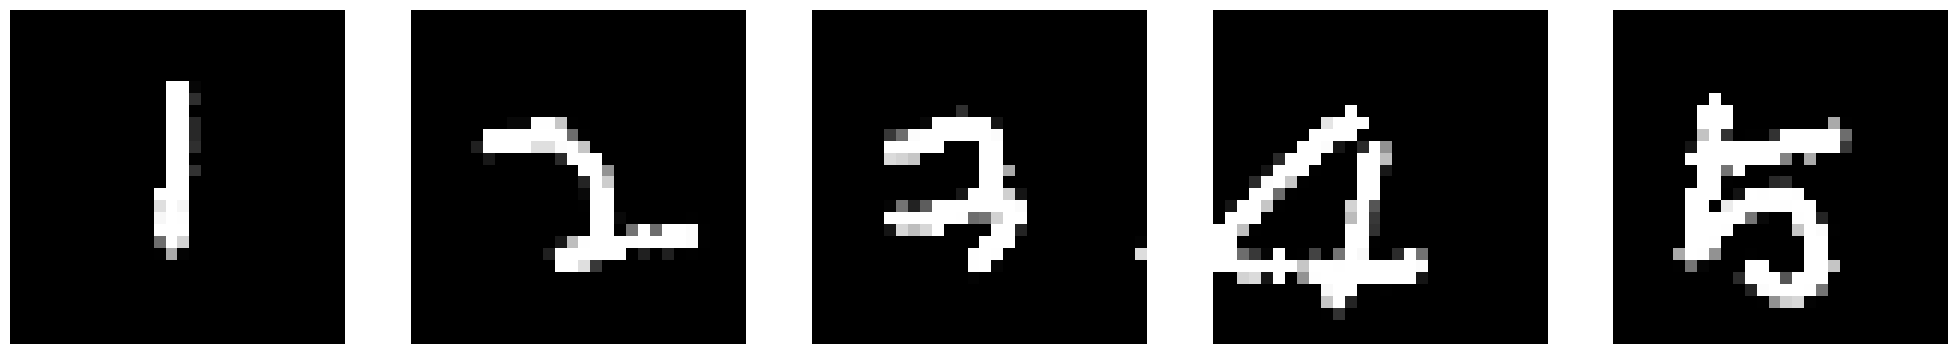

1/1 [==============================] - 0s 75ms/step


In [3]:
model = tf.keras.models.load_model("./saved_model/mlp_adam.h5")

def reset():
    global img
    img = np.ones((200, 520, 3), dtype=np.uint8) * 255
    for i in range(5):
        cv2.rectangle(img, (10 + i * 100, 50), (10 + (i + 1) * 100, 150), (0, 0, 255))
    cv2.putText(img, "e:erase s:show r:recognition q:quit", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1)
    
def grab_numerals():
    numerals = []
    for i in range(5):
        roi = img[51:149, 11+i*100:9+(i+1)*100, 0]
        roi = 255 - cv2.resize(roi, (28, 28), interpolation=cv2.INTER_CUBIC)
        numerals.append(roi)
    numerals = np.array(numerals)
    return numerals

def show():
    numerals = grab_numerals()
    plt.figure(figsize=(25, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(numerals[i], cmap="gray")
        plt.axis("off")
    plt.show()
    
def recognition():
    numerals = grab_numerals()
    numerals = numerals.reshape(5, 784)
    numerals = numerals.astype(np.float32) / 255.0
    res = model.predict(numerals)
    class_id = np.argmax(res, axis=1)
    for i in range(5):
        cv2.putText(img, str(class_id[i]), (50+i*100, 180), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
    winsound.Beep(1000, 500)
    
brush_size = 4
l_color = (0, 0, 0)

def writing(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), brush_size, l_color, -1)
    elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
        cv2.circle(img, (x,y), brush_size, l_color, -1)
        
reset()
cv2.namedWindow("Writing")
cv2.setMouseCallback("Writing", writing)

while True:
    cv2.imshow("Writing", img)
    key = cv2.waitKey(1)
    if key == ord('e'):
        reset()
    elif key == ord('s'):
        show()
    elif key == ord('r'):
        recognition()
    elif key == ord('q'):
        break
        
cv2.destroyAllWindows()

## 연습문제

In [4]:
# 문제 1
'''
k를 늘릴 수록 모델의 신뢰도는 향상 됨
다만 시간이 늘어남
'''

'\nk를 늘릴 수록 모델의 신뢰도는 향상 됨\n다만 시간이 늘어남\n'

In [5]:
# 문제 2
'''
or 문제를 해결할 수 있는 decision boundary는 무수히 많다.
'''

'\nor 문제를 해결할 수 있는 decision boundary는 무수히 많다.\n'

In [ ]:
# 문제 3


In [32]:
# 문제 4
def tau(x):
    return np.where(x > 0, 1., -1.)

w1 = np.array([[-0.5, 1., 1.],
              [1.5, -1., -1.]])
w2 = np.array([[-1., 1., 1.]])
forward = lambda x: tau(w2 @ np.append([1.], tau(w1 @ x.T)))

check1 = forward(np.array([1, 0, 0]))
check2 = forward(np.array([1, 1, 0]))
check3 = forward(np.array([1, 0, 1]))
check4 = forward(np.array([1, 1, 1]))
print(check1, check2, check3, check4)

[-1.] [1.] [1.] [-1.]


In [33]:
# 문제 5
w1 = np.array([[0.5, -1., 1.],
              [-1.5, 1., -1.]])
w2 = np.array([[-1., 1., 1.]])
forward = lambda x: tau(w2 @ np.append([1.], tau(w1 @ x.T)))
check1 = forward(np.array([1, 0, 0]))
check2 = forward(np.array([1, 1, 0]))
check3 = forward(np.array([1, 0, 1]))
check4 = forward(np.array([1, 1, 1]))
print(check1, check2, check3, check4)

[-1.] [-1.] [-1.] [-1.]


In [39]:
# 문제 6
u = 0.8
x = 0.2
y = 1
p = 0.1
def der(x, y, u):
    return 2 * (x)**2 * u - 2 * y * x

for _ in range(3):
    u = u - der(x, y, u)
print(u)

1.7295104000000001


In [40]:
# 문제 7
'''
DNN의 hyperparameter
num_layer : layer의 수. layer 수가 늘어 날 수록 모델의 복잡도 상승. overfitting 위험성
num_units : layer당 unit의 수. layer와 비슷
optimzer : 최적화 알고리즘. 그냥 Adam을 많이 쓴다.
loss_fn : loss function. 상황에 맞게 써야함.
그 외, BN의 beta, dropout rate, learning rate 등
'''

'\nDNN의 hyperparameter\nnum_layer : layer의 수. layer 수가 늘어 날 수록 모델의 복잡도 상승. overfitting 위험성\nnum_units : layer당 unit의 수. layer와 비슷\noptimzer : 최적화 알고리즘. 그냥 Adam을 많이 쓴다.\nloss_fn : loss function. 상황에 맞게 써야함.\n그 외, BN의 beta, dropout rate, learning rate 등\n'

In [43]:
# 문제 8
for lr in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
    mlp = Sequential([
        Dense(units=512, activation="tanh", input_shape=(784,)),
        Dense(units=10, activation="softmax")
    ])
    log_dir = "logs/lr_fit/mlp_Adam_{}".format(lr)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    mlp.compile(loss="MSE", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
    mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=0,
           callbacks=[tensorboard_callback])

    res = mlp.evaluate(x_test, y_test, verbose=0)
    print("accuracy =", res[1] * 100)

accuracy = 97.99000024795532
accuracy = 98.07999730110168
accuracy = 98.14000129699707
accuracy = 98.11999797821045
accuracy = 98.28000068664551


In [45]:
# 문제 9
'''
keras tuner : https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=ko
wandb : https://wandb.ai/site
'''

'\nkeras tuner : https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=ko\nwandb : https://wandb.ai/site\n'

In [44]:
# 문제 10
model = tf.keras.models.load_model("./saved_model/mlp_adam.h5")

def reset():
    global img
    img = np.ones((200, 520, 3), dtype=np.uint8) * 255
    for i in range(5):
        cv2.rectangle(img, (10 + i * 100, 50), (10 + (i + 1) * 100, 150), (0, 0, 255))
    cv2.putText(img, "e:erase s:show r:recognition q:quit", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1)
    
def grab_numerals():
    numerals = []
    for i in range(5):
        roi = img[51:149, 11+i*100:9+(i+1)*100, 0]
        roi = 255 - cv2.resize(roi, (28, 28), interpolation=cv2.INTER_CUBIC)
        numerals.append(roi)
    numerals = np.array(numerals)
    return numerals

def show():
    numerals = grab_numerals()
    plt.figure(figsize=(25, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(numerals[i], cmap="gray")
        plt.axis("off")
    plt.show()
    
def recognition():
    numerals = grab_numerals()
    numerals = numerals.reshape(5, 784)
    numerals = numerals.astype(np.float32) / 255.0
    res = model.predict(numerals)
    class_id = np.argmax(res, axis=1)
    second_id = np.argsort(res, axis=1)[..., -2]
    for i in range(5):
        cv2.putText(img, "{}({})".format(class_id[i], second_id[i]), (50+i*100, 180), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
    winsound.Beep(1000, 500)
    
brush_size = 4
l_color = (0, 0, 0)

def writing(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), brush_size, l_color, -1)
    elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
        cv2.circle(img, (x,y), brush_size, l_color, -1)
        
reset()
cv2.namedWindow("Writing")
cv2.setMouseCallback("Writing", writing)

while True:
    cv2.imshow("Writing", img)
    key = cv2.waitKey(1)
    if key == ord('e'):
        reset()
    elif key == ord('s'):
        show()
    elif key == ord('r'):
        recognition()
    elif key == ord('q'):
        break
        
cv2.destroyAllWindows()

1/1 [==============================] - 0s 35ms/step
